In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dc_stat_think as dcst
import math
from collections import Counter
import datetime


pd.set_option('display.max_columns', None,'display.max_row', None)
# pd.set_option('display.max_rows', 1000)

default_figsize = (15,5)

In [2]:
# One-hot encoder
def onehot_encoder(df: pd.DataFrame, col_name: str, num_selected: int) -> pd.DataFrame:
    '''
    Performs one-hot encoding on a dataframe's column for its values with most occurrences

    :param pd.DataFrame df: dataframe to be processed
    :param str col_name: name of the encoded column
    :param int num_selected: number of values with most occurrences
    :return: processed dataframe
    :rtype: pd.DataFrame
    '''
    series = df[col_name].value_counts()
    selected_col_name = series.head(num_selected).index.tolist()

    for item in selected_col_name:
        df[col_name + "_" + item] = np.where(df[col_name] == item, 1, 0) # whenever df[col_name] == cat replace it with 1 else 0
        
    df.drop(columns=col_name, inplace=True)
    return df

In [3]:
df = pd.read_csv('unifed_csv_without_duplicated_company.csv')
df.head()

,company_uuid,country_code,region,city,operating,closed,success,success_acquired,success_ipo,num_funding_rounds,total_funding_usd,founded_on,last_funding_on,closed_on,employee_count,primary_role_company,primary_role_school,primary_role_investor,num_exits,Financial Services,FinTech,Finance,Blockchain,Information Technology,Software,Payments,Cryptocurrency,Venture Capital,Internet,Banking,Consulting,Mobile Payments,E-Commerce,Insurance,Bitcoin,Artificial Intelligence,Mobile,Crowdfunding,SaaS,Real Estate,Apps,Personal Finance,Accounting,Mobile Apps,Asset Management,Marketplace,Lending,Big Data,Machine Learning,fund_rd_investment_type,fund_rd_announced_on,fund_rd_raised_amount_usd,fund_rd_post_money_valuation_usd,fund_rd_investor_count,investment_count,any_partner,any_top_partner,ipo_went_public_on,ipo_share_price_usd,ipo_valuation_price_usd,ipo_money_raised_usd,funds_raised_amount_usd,acquisitions_acquirer_uuid,acquisitions_acquired_on,acquisitions_price_usd,parent_org_parent_uuid,event_count,job_duration,gender_male,gender_female,degree_type,subject_Computer Science,subject_Economics,subject_Finance,subject_Electrical Engineering,subject_Business Administration,subject_Mechanical Engineering,subject_Marketing,subject_Accounting,subject_Law,subject_Business,subject_Computer Engineering,subject_Physics,subject_Political Science,subject_Management,subject_Engineering,subject_Psychology,subject_Mathematics,subject_Chemical Engineering,subject_Chemistry,subject_History,subject_Biology,subject_International Business,subject_Information Technology,subject_Business Management,subject_English,subject_Industrial Engineering,subject_Civil Engineering,subject_Biochemistry,subject_Medicine,subject_Philosophy,continent,USA,GBR,CHN,IND,CAN,SGP,DEU,AUS,BRA,CHE,city_London,city_New_York,city_San_Francisco,city_Singapore,city_Beijing,city_Toronto,city_Shanghai,city_Los_Angeles,city_Chicago,city_Shenzhen,has_acquisitions,has_ipo,time_in_year,investment_delta,norm_amount_delta,momentum,ROI,max_norm_amount_delta,mean_norm_amount_delta,roi_from_mean_momentum
0,0001a6ec-e7e9-4d1b-8a77-adb5ac815420,JPN,Tokyo,Tokyo,1,0,0,0,0,NaN,NaN,3.0767,NaN,NaN,unknown,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,5.9945,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0003f244-79d0-6178-353e-33dabaf3b2c6,USA,California,San Francisco,1,0,0,0,0,NaN,NaN,5.6658,NaN,NaN,51-100,0,0,1,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,5.9151,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00057beb-5724-c809-5cd2-a0a7c6b017aa,ESP,Madrid,Madrid,1,0,0,0,0,NaN,NaN,10.0822,NaN,NaN,1-10,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EU,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000ab460-8462-450d-ab34-b3c54fc252fd,LKA,Western,Colombo,1,0,0,0,0,NaN,NaN,3.0767,NaN,NaN,1-10,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000ad7a8-b868-f301-5f00-2a3361288fc9,USA,New York,Brooklyn,1,0,0,0,0,2.0,25200000.0,9.2219,201

In [4]:
# #Fillna for acquisition prices, selective mean value method
# df['acquisitions_acquirer_name'] = df['acquisitions_acquirer_name'].fillna("")
# mean = df['acquisitions_price_usd'].mean()
# #Selecting 0 or mean to be filled
# def fillwhat(df): 
#     if df['acquisitions_acquirer_name']=="" :
#         return 0
#     else :
#         return mean

# fill_df = df.copy()
# fill_df = fill_df[['acquisitions_price_usd','acquisitions_acquirer_name']].apply(fillwhat, axis=1)
# fill_df = pd.DataFrame(fill_df)
# df['acquisitions_price_usd'] = fill_df

# #drop the name column which has no use any more
# df = df.drop(columns=['acquisitions_acquirer_name'])

In [5]:
"""
#Fillna for total funds, selective mean value method
df['num_funding_rounds'] = df['num_funding_rounds'].fillna("0")
mean = df['total_funding_usd'].mean()
#Selecting 0 or mean to be filled
def fillwhat(df): 
    if df['num_funding_rounds']==0 :
        return 0
    else :
        return mean

fill_df = df.copy()
fill_df = fill_df[['total_funding_usd','num_funding_rounds']].apply(fillwhat, axis=1)
fill_df = pd.DataFrame(fill_df)
df['total_funding_usd'] = fill_df
"""

'\n#Fillna for total funds, selective mean value method\ndf[\'num_funding_rounds\'] = df[\'num_funding_rounds\'].fillna("0")\nmean = df[\'total_funding_usd\'].mean()\n#Selecting 0 or mean to be filled\ndef fillwhat(df): \n    if df[\'num_funding_rounds\']==0 :\n        return 0\n    else :\n        return mean\n\nfill_df = df.copy()\nfill_df = fill_df[[\'total_funding_usd\',\'num_funding_rounds\']].apply(fillwhat, axis=1)\nfill_df = pd.DataFrame(fill_df)\ndf[\'total_funding_usd\'] = fill_df\n'

In [6]:
#Fillna for counts, fill with 0 method
col_nan_to_zero = ['investment_count', 'fund_rd_investor_count', 'any_partner', 'any_top_partner', 'num_exits', 'event_count']
for col in col_nan_to_zero:
    df[col] = df[col].fillna(0)

df.iloc[:,13:43] = df.iloc[:,13:43].fillna(0)
df.iloc[:,64:] = df.iloc[:,64:].fillna(0)

In [7]:
df.head()

,company_uuid,country_code,region,city,operating,closed,success,success_acquired,success_ipo,num_funding_rounds,total_funding_usd,founded_on,last_funding_on,closed_on,employee_count,primary_role_company,primary_role_school,primary_role_investor,num_exits,Financial Services,FinTech,Finance,Blockchain,Information Technology,Software,Payments,Cryptocurrency,Venture Capital,Internet,Banking,Consulting,Mobile Payments,E-Commerce,Insurance,Bitcoin,Artificial Intelligence,Mobile,Crowdfunding,SaaS,Real Estate,Apps,Personal Finance,Accounting,Mobile Apps,Asset Management,Marketplace,Lending,Big Data,Machine Learning,fund_rd_investment_type,fund_rd_announced_on,fund_rd_raised_amount_usd,fund_rd_post_money_valuation_usd,fund_rd_investor_count,investment_count,any_partner,any_top_partner,ipo_went_public_on,ipo_share_price_usd,ipo_valuation_price_usd,ipo_money_raised_usd,funds_raised_amount_usd,acquisitions_acquirer_uuid,acquisitions_acquired_on,acquisitions_price_usd,parent_org_parent_uuid,event_count,job_duration,gender_male,gender_female,degree_type,subject_Computer Science,subject_Economics,subject_Finance,subject_Electrical Engineering,subject_Business Administration,subject_Mechanical Engineering,subject_Marketing,subject_Accounting,subject_Law,subject_Business,subject_Computer Engineering,subject_Physics,subject_Political Science,subject_Management,subject_Engineering,subject_Psychology,subject_Mathematics,subject_Chemical Engineering,subject_Chemistry,subject_History,subject_Biology,subject_International Business,subject_Information Technology,subject_Business Management,subject_English,subject_Industrial Engineering,subject_Civil Engineering,subject_Biochemistry,subject_Medicine,subject_Philosophy,continent,USA,GBR,CHN,IND,CAN,SGP,DEU,AUS,BRA,CHE,city_London,city_New_York,city_San_Francisco,city_Singapore,city_Beijing,city_Toronto,city_Shanghai,city_Los_Angeles,city_Chicago,city_Shenzhen,has_acquisitions,has_ipo,time_in_year,investment_delta,norm_amount_delta,momentum,ROI,max_norm_amount_delta,mean_norm_amount_delta,roi_from_mean_momentum
0,0001a6ec-e7e9-4d1b-8a77-adb5ac815420,JPN,Tokyo,Tokyo,1,0,0,0,0,NaN,NaN,3.0767,NaN,0,unknown,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,5.9945,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
1,0003f244-79d0-6178-353e-33dabaf3b2c6,USA,California,San Francisco,1,0,0,0,0,NaN,NaN,5.6658,NaN,0,51-100,0,0,1,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,5.9151,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
2,00057beb-5724-c809-5cd2-a0a7c6b017aa,ESP,Madrid,Madrid,1,0,0,0,0,NaN,NaN,10.0822,NaN,0,1-10,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EU,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
3,000ab460-8462-450d-ab34-b3c54fc252fd,LKA,Western,Colombo,1,0,0,0,0,NaN,NaN,3.0767,NaN,0,1-10,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
4,000ad7a8-b868-f301-5f00-2a3361288fc9,USA,New York,Brooklyn,1,0,0,0,0,2.0,25200000.0,9.2219,2016-04-14,0,11-50,1,0,0,0.0,0,0,0,0,0,

In [8]:
#types_series = df['status'].value_counts()
#print(types_series)

In [9]:
# df['status'] = df['status'].fillna("")
# operating = []
# success = []
# closed = []
# acquired = []
# ipo = []

# #If match append 1 otherwise append 0. Equivalent for one-hot encoding
# for i in df['status']:
#     if "operating" in i:
#         operating.append(1)
#     else:
#         operating.append(0)
#     if "acquired" in i or "ipo" in i:
#         success.append(1)
#         if "acquired" in i:
#             acquired.append(1)
#         else:
#             acquired.append(0)
#         if "ipo" in i:
#             ipo.append(1)
#         else:
#             ipo.append(0)
#     else:
#         success.append(0) 
#         acquired.append(0)
#         ipo.append(0)
#     if "closed" in i:
#         closed.append(1)  
#     else:
#         closed.append(0)  

# df.insert(4,'operating',value = operating)
# df.insert(5,'closed',value = closed)
# df.insert(6,'success',value = success)
# df.insert(7,'success_acquired', value = acquired)
# df.insert(8,'success_ipo',value = ipo)   
        
# #Drop the encoded column
# df=df.drop(['status'],axis=1)

In [10]:
#types_series = df['primary_role'].value_counts()
#print(types_series)

In [11]:
# df['primary_role'] = df['primary_role'].fillna("")
# company = []
# investor = []
# school = []

# #If match append 1 otherwise append 0. Equivalent for one-hot encoding
# for i in df['primary_role']:
#     if "company" in i:
#         company.append(1)
#     else:
#         company.append(0)
#     if "investor" in i:
#         investor.append(1)
#     else:
#         investor.append(0)
#     if "school" in i:
#         school.append(1)
#     else:
#         school.append(0)

# df.insert(15,'primary_role_company',value = company)
# df.insert(16,'primary_role_school',value = school)
# df.insert(17,'primary_role_investor', value = investor)
            
# #Drop the encoded column
# df=df.drop(['primary_role'],axis=1)

In [12]:
df.head()

,company_uuid,country_code,region,city,operating,closed,success,success_acquired,success_ipo,num_funding_rounds,total_funding_usd,founded_on,last_funding_on,closed_on,employee_count,primary_role_company,primary_role_school,primary_role_investor,num_exits,Financial Services,FinTech,Finance,Blockchain,Information Technology,Software,Payments,Cryptocurrency,Venture Capital,Internet,Banking,Consulting,Mobile Payments,E-Commerce,Insurance,Bitcoin,Artificial Intelligence,Mobile,Crowdfunding,SaaS,Real Estate,Apps,Personal Finance,Accounting,Mobile Apps,Asset Management,Marketplace,Lending,Big Data,Machine Learning,fund_rd_investment_type,fund_rd_announced_on,fund_rd_raised_amount_usd,fund_rd_post_money_valuation_usd,fund_rd_investor_count,investment_count,any_partner,any_top_partner,ipo_went_public_on,ipo_share_price_usd,ipo_valuation_price_usd,ipo_money_raised_usd,funds_raised_amount_usd,acquisitions_acquirer_uuid,acquisitions_acquired_on,acquisitions_price_usd,parent_org_parent_uuid,event_count,job_duration,gender_male,gender_female,degree_type,subject_Computer Science,subject_Economics,subject_Finance,subject_Electrical Engineering,subject_Business Administration,subject_Mechanical Engineering,subject_Marketing,subject_Accounting,subject_Law,subject_Business,subject_Computer Engineering,subject_Physics,subject_Political Science,subject_Management,subject_Engineering,subject_Psychology,subject_Mathematics,subject_Chemical Engineering,subject_Chemistry,subject_History,subject_Biology,subject_International Business,subject_Information Technology,subject_Business Management,subject_English,subject_Industrial Engineering,subject_Civil Engineering,subject_Biochemistry,subject_Medicine,subject_Philosophy,continent,USA,GBR,CHN,IND,CAN,SGP,DEU,AUS,BRA,CHE,city_London,city_New_York,city_San_Francisco,city_Singapore,city_Beijing,city_Toronto,city_Shanghai,city_Los_Angeles,city_Chicago,city_Shenzhen,has_acquisitions,has_ipo,time_in_year,investment_delta,norm_amount_delta,momentum,ROI,max_norm_amount_delta,mean_norm_amount_delta,roi_from_mean_momentum
0,0001a6ec-e7e9-4d1b-8a77-adb5ac815420,JPN,Tokyo,Tokyo,1,0,0,0,0,NaN,NaN,3.0767,NaN,0,unknown,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,5.9945,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
1,0003f244-79d0-6178-353e-33dabaf3b2c6,USA,California,San Francisco,1,0,0,0,0,NaN,NaN,5.6658,NaN,0,51-100,0,0,1,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,5.9151,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
2,00057beb-5724-c809-5cd2-a0a7c6b017aa,ESP,Madrid,Madrid,1,0,0,0,0,NaN,NaN,10.0822,NaN,0,1-10,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EU,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
3,000ab460-8462-450d-ab34-b3c54fc252fd,LKA,Western,Colombo,1,0,0,0,0,NaN,NaN,3.0767,NaN,0,1-10,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
4,000ad7a8-b868-f301-5f00-2a3361288fc9,USA,New York,Brooklyn,1,0,0,0,0,2.0,25200000.0,9.2219,2016-04-14,0,11-50,1,0,0,0.0,0,0,0,0,0,

In [13]:
# #make sure to do <pip install pycountry-convert> and <pip install geopy>
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2, country_alpha3_to_country_alpha2
#import pycountry_convert
from geopy.geocoders import Nominatim

def get_continent(col):
    try:
        cn_a2_code =  country_alpha3_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_continent)

#def geolocate(country):
#    try:
#        # Geolocate the center of the country
#        loc = geolocator.geocode(country_alpha3_to_country_name(country))
#      # And return latitude and longitude
#        return (loc.latitude, loc.longitude)
#    except:
#        # Return missing value
#        return np.nan

df['continent'] = df['country_code'].apply(get_continent)
#df['location'] = df['country_code'].apply(geolocate)
#df['continent']
#df.iloc[:,16:].info()

In [14]:
#df['country_code'].value_counts().head(10)
#df['city'].value_counts().head(10)

In [15]:
# 'World Cities Database' by Simplemaps.com is licensed under CC BY 4.0.
worldcities_df = pd.read_csv('worldcities.csv')
keep_col = ['city', 'lat', 'lng']
worldcities_df = worldcities_df[keep_col]

In [16]:
# city_count_df is used to visualize the world map only
city_count_df = df[['company_uuid', 'city']]

In [17]:
# join df to link up city, count and location (lat, lng)
city_count_df = city_count_df.set_index('city').join(worldcities_df.set_index('city'))
city_count_df.reset_index(inplace=True)
# dropna as they cannot be plotted
city_count_df.dropna(subset=['lat', 'lng'], inplace=True)

The cell below is commented because it takes lots of time to run. It is STILL part of the final code.

In [18]:
# # installation
# # pip install folium

# # Create a world map to show distributions of organizations
# import folium
# from folium.plugins import MarkerCluster

# # empty map
# world_map= folium.Map(tiles="cartodbpositron")
# marker_cluster = MarkerCluster().add_to(world_map)

# # for each coordinate, create circlemarker of city
# for i in range(len(city_count_df)):
#         lat = city_count_df.iloc[i]['lat']
#         lng = city_count_df.iloc[i]['lng']
#         radius = 5
#         popup_text = """City : {}<br>
#                     Count : {}<br>"""
#         popup_text = popup_text.format(city_count_df.iloc[i]['city'],
#                                    city_count_df.iloc[i]['company_uuid']
#                                    )
#         folium.CircleMarker(location=[lat, lng], radius=radius, popup=popup_text, fill=True).add_to(marker_cluster)
# sw = city_count_df[['lat','lng']].min().values.tolist()
# ne = city_count_df[['lat','lng']].max().values.tolist()

# world_map.fit_bounds([sw, ne])
# # show the map
# # world_map

# # export the map as .html file
# world_map.save('world_map_fintech_companies.html')

In [19]:
# numbers obtained by inspection on value_counts()
num_country_keep = 20
num_city_keep = 20
df = onehot_encoder(df, 'country_code', num_country_keep)
df = onehot_encoder(df, 'city', num_city_keep)

In [20]:
#acquisitions_acquired_on   >>change to integer values
# find the duration of the job
df = df.reset_index(drop=True)
num_data = len(df)
today = ["2021-01-28"] * num_data
df['today'] = pd.DataFrame(today)
df['acquisitions_acquired_on'] = pd.to_datetime(df['today'], errors='coerce', format='%Y-%m-%d') - pd.to_datetime(df['acquisitions_acquired_on'], errors='coerce', format='%d/%m/%Y')
df['acquisitions_acquired_on'] = pd.to_numeric(df['acquisitions_acquired_on'].dt.days, downcast='integer')
df['acquisitions_acquired_on'] = df['acquisitions_acquired_on'].fillna(0)
df['acquisitions_acquired_on'] = df['acquisitions_acquired_on'].apply(lambda x: round(int(x)/365,4))
df['acquisitions_acquired_on'] = df['acquisitions_acquired_on'].apply(lambda x: x if x != 0 else None)

# take mean for NaN
#mean = df['acquisitions_acquired_on'].mean()
#df['acquisitions_acquired_on'].fillna(value=mean, inplace=True)
# convert TimeDelta to int
#df['acquisitions_acquired_on'] = df['acquisitions_acquired_on'].apply(lambda x: x.days)
# By Stardust: how to handle NaN? Too many of them
# By Boris 0116: Not handle NaN then, do the same as ipo
df['has_acquisitions'] = 1*~df['acquisitions_acquired_on'].isnull()

#ipo_share_price_usd    >>change to yes/no ipos
df['ipo_went_public_on'] = pd.to_datetime(df['today'], errors='coerce', format='%Y-%m-%d') - pd.to_datetime(df['ipo_went_public_on'], errors='coerce', format='%d/%m/%Y')
df['ipo_went_public_on'] = pd.to_numeric(df['ipo_went_public_on'].dt.days, downcast='integer')
df['ipo_went_public_on'] = df['ipo_went_public_on'].fillna(0)
df['ipo_went_public_on'] = df['ipo_went_public_on'].apply(lambda x: round(int(x)/365,4))
df['ipo_went_public_on'] = df['ipo_went_public_on'].apply(lambda x: x if x != 0 else None)

df['has_ipo'] = 1*~df['ipo_share_price_usd'].isnull()

In [21]:
# Encode dates for founded_on (into year counted from now as 01-28-2021)
df['founded_on'] = pd.to_datetime(df['today'], errors='coerce', format='%Y-%m-%d') - pd.to_datetime(df['founded_on'], errors='coerce', format='%Y/%m/%d')
df['founded_on'] = pd.to_numeric(df['founded_on'].dt.days, downcast='integer')
mean = df['founded_on'].mean()
df['founded_on'] = df['founded_on'].fillna(mean)
df['founded_on'] = df['founded_on'].apply(lambda x: round(int(x)/365,4))

# Encode dates for job duration (into year)
df['job_duration'] = df['job_duration'].fillna(0)
df['job_duration'] = df['job_duration'].apply(lambda x: round(int(x)/365,4))
df['job_duration'] = df['job_duration'].apply(lambda x: x if x != 0 else None)
df = df.drop(columns = ['today'])

In [22]:
# # Join the ROI dataframe
# roi_df = pd.read_csv('ROI.csv')
# df = df.set_index('company_uuid').join(roi_df.set_index('org_uuid'))

In [23]:
# df.insert(0,'company_uuid', df.index)
# df.reset_index(inplace = True, drop = True)
# df.head()

In [24]:
df.drop_duplicates(subset='company_uuid', inplace=True)

In [25]:
# sns.jointplot(x='xxx, y='yyy', data=, color = 'k')

In [26]:
mean_momentum = []
df['momentum'] = df['momentum'].fillna("na")
for moment in df['momentum']:
    if moment != "na":
        if "inf" not in moment:
            list = moment[1:-1].split(", ")
            total = 0
            for each in list:
                total += float(each)
            mean_momentum.append(total / len(moment))
            #mean_momentum.append(each for each in moment)
        else:
            mean_momentum.append(np.inf)
    else:
        mean_momentum.append(np.nan)
df['roi_from_mean_momentum'] = mean_momentum

df['momentum'] = df['momentum'].apply(lambda x: np.nan if x == "na" else x)

TypeError: argument of type 'int' is not iterable

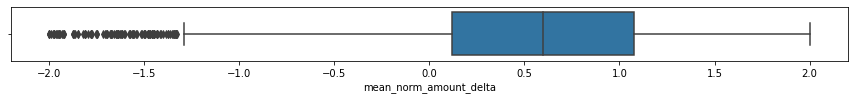

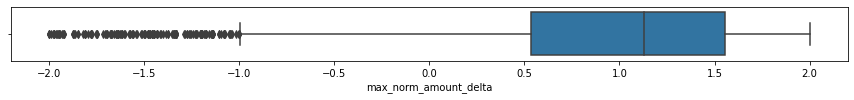

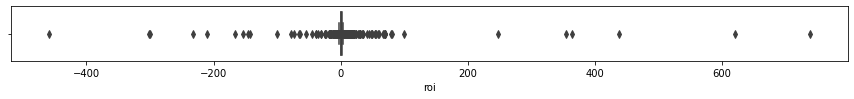

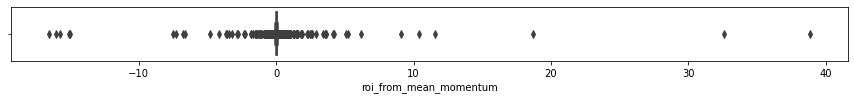

In [30]:
df['roi'] = df['ROI'].replace([np.inf, -np.inf], np.nan)
df['roi_mean_momentum'] = df['roi_from_mean_momentum'].replace([np.inf, -np.inf], np.nan)
numerical_features = ['mean_norm_amount_delta', 'max_norm_amount_delta', 'roi', 'roi_from_mean_momentum']
    
for feature in numerical_features:
    fig, ax = plt.subplots(figsize=(15,1))
    sns.boxplot(data=df, x=feature)
    plt.show()

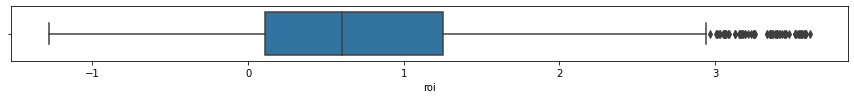

In [31]:
num_z_score = 0.1
roi_no_extreme = df[np.abs(df['roi']-df['roi'].mean()) <= (num_z_score*df['roi'].std())]
fig, ax = plt.subplots(figsize=(15,1))
sns.boxplot(data=roi_no_extreme, x='roi')
plt.show()

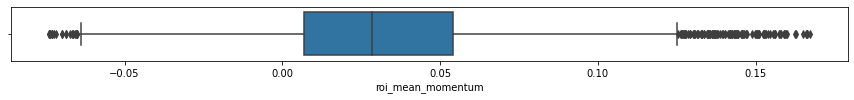

In [32]:
num_z_score = 0.1
roi_mean_no_extreme = df[np.abs(df['roi_mean_momentum']-df['roi_mean_momentum'].mean()) <= (num_z_score*df['roi_mean_momentum'].std())]
fig, ax = plt.subplots(figsize=(15,1))
sns.boxplot(data=roi_mean_no_extreme, x="roi_mean_momentum")
plt.show()

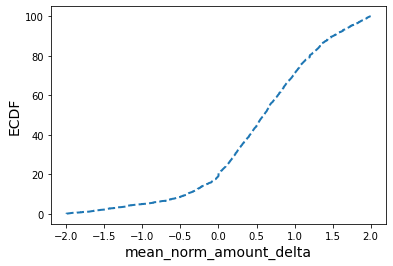

In [33]:
# Generate x and y values for ECDF: x, y
x, y = dcst.ecdf(df['mean_norm_amount_delta'])
# Plot the ECDF as dots
_ = plt.plot(x, y*100, linestyle='--', lw = 2)
# Label axes and show plot
_ = plt.xlabel('mean_norm_amount_delta', size = 14)
_ = plt.ylabel('ECDF', size = 14)
plt.show()

In [34]:
print(np.percentile(df['mean_norm_amount_delta'].dropna(how='any'), [68, 95, 99.7]))

[0.94208516 1.73613909 1.98411989]


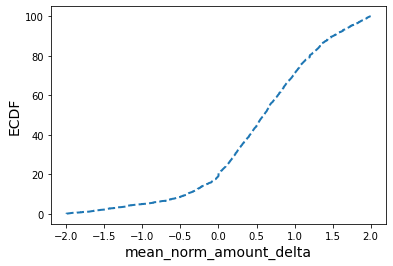

In [35]:
# Generate x and y values for ECDF: x, y
x, y = dcst.ecdf(df['mean_norm_amount_delta'])
# Plot the ECDF as dots
_ = plt.plot(x, y*100, linestyle='--', lw = 2)
# Label axes and show plot
_ = plt.xlabel('mean_norm_amount_delta', size = 14)
_ = plt.ylabel('ECDF', size = 14)
plt.show()

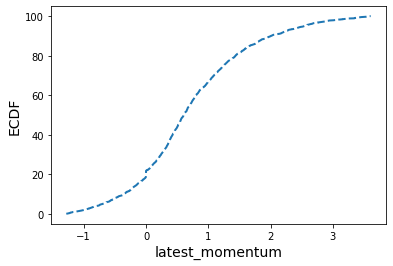

In [36]:
# Generate x and y values for ECDF: x, y
# x, y = dcst.ecdf(df['roi'])
x, y = dcst.ecdf(roi_no_extreme['roi'])
# Plot the ECDF as dots
_ = plt.plot(x, y*100, linestyle='--', lw = 2)
# Label axes and show plot
_ = plt.xlabel('latest_momentum', size = 14)
_ = plt.ylabel('ECDF', size = 14)
plt.show()

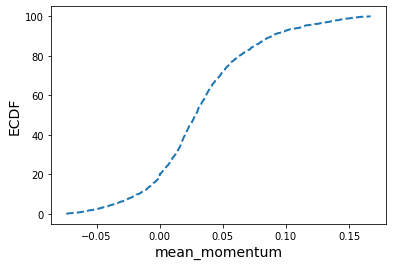

In [37]:
# Generate x and y values for ECDF: x, y
x, y = dcst.ecdf(roi_mean_no_extreme['roi_mean_momentum'])
# Plot the ECDF as dots
_ = plt.plot(x, y*100, linestyle='--', lw = 2)
# Label axes and show plot
_ = plt.xlabel('mean_momentum', size = 14)
_ = plt.ylabel('ECDF', size = 14)
plt.show()

In [38]:
print(np.percentile(df['max_norm_amount_delta'].dropna(how='any'), [68, 95, 99.7]))

[1.42857143 1.91432102 1.996004  ]


In [40]:
df = df.drop(columns=['roi', 'roi_mean_momentum', 'fund_rd_country_code', 'acquisitions_acquirer_country_code','countries_list','cities_list'])
#drop it when we are 100% sure no need to use country/region/city anymore
#df.drop(columns=['country_code','region','city'])

In [41]:
df.head()

,company_uuid,country_code,region,city,operating,closed,success,success_acquired,success_ipo,num_funding_rounds,total_funding_usd,founded_on,last_funding_on,closed_on,employee_count,primary_role_company,primary_role_school,primary_role_investor,num_exits,Financial Services,FinTech,Finance,Blockchain,Information Technology,Software,Payments,Cryptocurrency,Venture Capital,Internet,Banking,Consulting,Mobile Payments,E-Commerce,Insurance,Bitcoin,Artificial Intelligence,Mobile,Crowdfunding,SaaS,Real Estate,Apps,Personal Finance,Accounting,Mobile Apps,Asset Management,Marketplace,Lending,Big Data,Machine Learning,fund_rd_investment_type,fund_rd_announced_on,fund_rd_raised_amount_usd,fund_rd_post_money_valuation_usd,fund_rd_investor_count,investment_count,any_partner,any_top_partner,ipo_went_public_on,ipo_share_price_usd,ipo_valuation_price_usd,ipo_money_raised_usd,funds_raised_amount_usd,acquisitions_acquirer_uuid,acquisitions_acquired_on,acquisitions_price_usd,parent_org_parent_uuid,event_count,job_duration,gender_male,gender_female,degree_type,subject_Computer Science,subject_Economics,subject_Finance,subject_Electrical Engineering,subject_Business Administration,subject_Mechanical Engineering,subject_Marketing,subject_Accounting,subject_Law,subject_Business,subject_Computer Engineering,subject_Physics,subject_Political Science,subject_Management,subject_Engineering,subject_Psychology,subject_Mathematics,subject_Chemical Engineering,subject_Chemistry,subject_History,subject_Biology,subject_International Business,subject_Information Technology,subject_Business Management,subject_English,subject_Industrial Engineering,subject_Civil Engineering,subject_Biochemistry,subject_Medicine,subject_Philosophy,continent,USA,GBR,CHN,IND,CAN,SGP,DEU,AUS,BRA,CHE,city_London,city_New_York,city_San_Francisco,city_Singapore,city_Beijing,city_Toronto,city_Shanghai,city_Los_Angeles,city_Chicago,city_Shenzhen,has_acquisitions,has_ipo,time_in_year,investment_delta,norm_amount_delta,momentum,ROI,max_norm_amount_delta,mean_norm_amount_delta,roi_from_mean_momentum
0,0001a6ec-e7e9-4d1b-8a77-adb5ac815420,JPN,Tokyo,Tokyo,1,0,0,0,0,NaN,NaN,3.0767,NaN,NaN,unknown,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,5.9945,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0003f244-79d0-6178-353e-33dabaf3b2c6,USA,California,San Francisco,1,0,0,0,0,NaN,NaN,5.6658,NaN,NaN,51-100,0,0,1,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,5.9151,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00057beb-5724-c809-5cd2-a0a7c6b017aa,ESP,Madrid,Madrid,1,0,0,0,0,NaN,NaN,10.0822,NaN,NaN,1-10,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EU,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,000ab460-8462-450d-ab34-b3c54fc252fd,LKA,Western,Colombo,1,0,0,0,0,NaN,NaN,3.0767,NaN,NaN,1-10,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,000ad7a8-b868-f301-5f00-2a3361288fc9,USA,New York,Brooklyn,1,0,0,0,0,2.0,25200000.0,9.2219,2016

In [42]:
# df.to_csv("unifed_csv_without_duplicated_company.csv", index=False)